In [15]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend

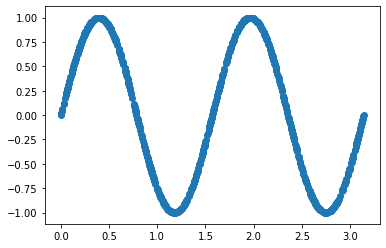

In [66]:
xrange=[0,np.pi]
period=0.5*np.pi
N=1000
x=np.random.rand(N)*(xrange[1]-xrange[0])+xrange[0]
y=np.sin(x*(2*np.pi/period))
plt.scatter(x,y)

In [70]:
xtestrange=xrange
x_test=np.random.rand(int(N/10))*(xtestrange[1]-xtestrange[0])+xtestrange[0]
y_test=np.sin(x_test*(2*np.pi/period))

In [74]:
inputs=keras.Input(shape=(2,))
xx=keras.layers.Dense(8,activation='relu')(inputs)
xx=keras.layers.Dense(8,activation='relu')(xx)
xx=keras.layers.Dense(8,activation='relu')(xx)
outputs=keras.layers.Dense(1,activation='linear')(xx)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='Nadam',
              loss='MAE',
              metrics=['accuracy'])

In [81]:
x_squared=x**2
model.fit(np.array([x,x_squared]).T,y,epochs=1000,verbose=0)

In [82]:
model.evaluate(np.array([x_test,x_test**2]).T,y_test,verbose=2)

100/1 - 0s - loss: 0.0193 - accuracy: 0.0000e+00


[0.01234087698161602, 0.0]

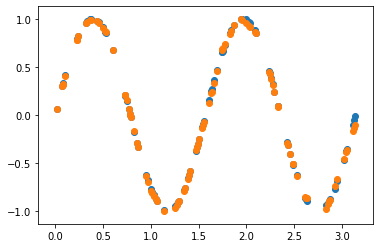

In [83]:
predictions=model.predict(np.array([x_test,x_test**2]).T,verbose=0)
plt.scatter(x_test,y_test)
plt.scatter(x_test,predictions)
plt.show()